In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
TRAINING_DATA_DIR = '/content/drive/MyDrive/New Data/Training'
VALID_DATA_DIR = '/content/drive/MyDrive/New Data/Validation'
dir_path='/content/drive/MyDrive/TEST/'

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAINING_DATA_DIR,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 866 files belonging to 4 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
VALID_DATA_DIR,

  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 164 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Grenade', 'Knife', 'Pistol', 'Random']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
28/28 [==============================] - 74s 2s/step - loss: 1.6084 - accuracy: 0.3614 - val_loss: 1.5146 - val_accuracy: 0.2683
Epoch 2/25
28/28 [==============================] - 1s 34ms/step - loss: 1.1183 - accuracy: 0.5081 - val_loss: 1.1261 - val_accuracy: 0.5061
Epoch 3/25
28/28 [==============================] - 1s 33ms/step - loss: 0.9318 - accuracy: 0.5820 - val_loss: 0.7950 - val_accuracy: 0.6646
Epoch 4/25
28/28 [==============================] - 1s 32ms/step - loss: 0.7140 - accuracy: 0.7159 - val_loss: 0.7796 - val_accuracy: 0.6951
Epoch 5/25
28/28 [==============================] - 1s 32ms/step - loss: 0.5152 - accuracy: 0.8014 - val_loss: 0.4887 - val_accuracy: 0.8537
Epoch 6/25
28/28 [==============================] - 1s 32ms/step - loss: 0.3155 - accuracy: 0.9030 - val_loss: 0.4741 - val_accuracy: 0.8537
Epoch 7/25
28/28 [==============================] - 1s 33ms/step - loss: 0.2254 - accuracy: 0.9353 - val_loss: 0.3609 - val_accuracy: 0.9085
Epoch 8/25
28/

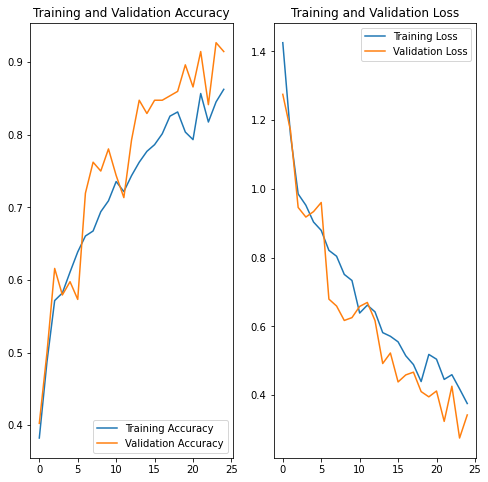

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

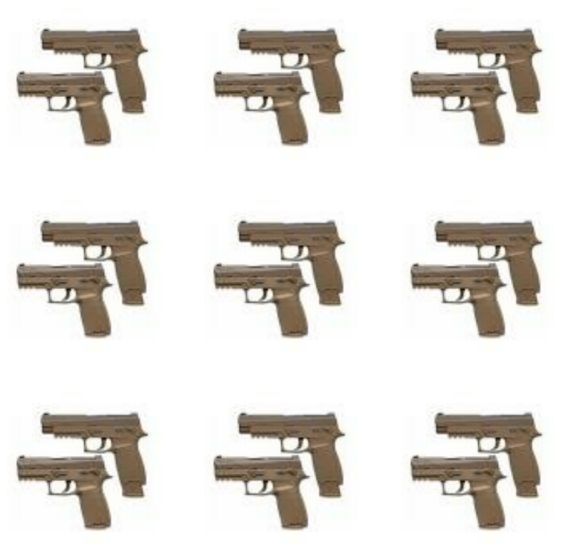

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
28/28 [==============================] - 2s 44ms/step - loss: 1.4249 - accuracy: 0.3822 - val_loss: 1.2748 - val_accuracy: 0.4024
Epoch 2/25
28/28 [==============================] - 1s 36ms/step - loss: 1.1570 - accuracy: 0.4873 - val_loss: 1.1699 - val_accuracy: 0.5000
Epoch 3/25
28/28 [==============================] - 1s 36ms/step - loss: 0.9851 - accuracy: 0.5716 - val_loss: 0.9459 - val_accuracy: 0.6159
Epoch 4/25
28/28 [==============================] - 1s 35ms/step - loss: 0.9524 - accuracy: 0.5820 - val_loss: 0.9180 - val_accuracy: 0.5793
Epoch 5/25
28/28 [==============================] - 1s 35ms/step - loss: 0.9035 - accuracy: 0.6109 - val_loss: 0.9338 - val_accuracy: 0.5976
Epoch 6/25
28/28 [==============================] - 1s 35ms/step - loss: 0.8792 - accuracy: 0.6386 - val_loss: 0.9603 - val_accuracy: 0.5732
Epoch 7/25
28/28 [==============================] - 1s 35ms/step - loss: 0.8211 - accuracy: 0.6605 - val_loss: 0.6794 - val_accuracy: 0.7195
Epoch 8/25
28

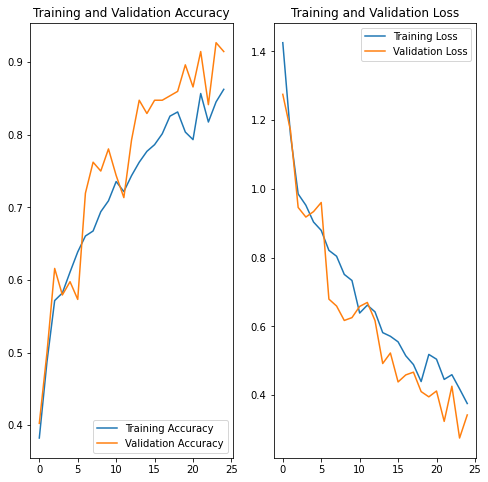

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

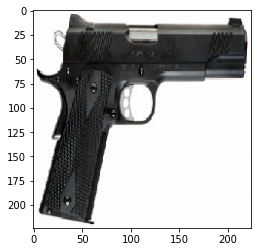

This is an image of a Pistol. Classified and retrieved with 99.77 percent certainity.
/content/drive/MyDrive/TEST/Pistol_1071_20.jpg


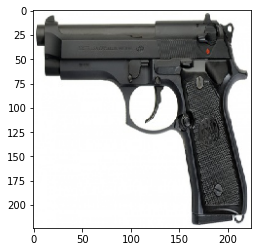

This is an image of a Pistol. Classified and retrieved with 97.14 percent certainity.
/content/drive/MyDrive/TEST/Pistol_1125_20.jpg


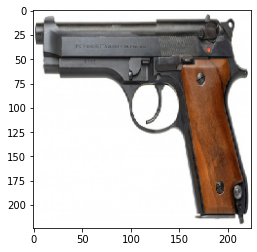

This is an image of a Pistol. Classified and retrieved with 95.93 percent certainity.
/content/drive/MyDrive/TEST/Pistol_1224_3.jpg


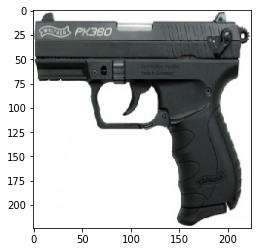

This is an image of a Pistol. Classified and retrieved with 99.89 percent certainity.
/content/drive/MyDrive/TEST/Pistol_1627_43.jpg


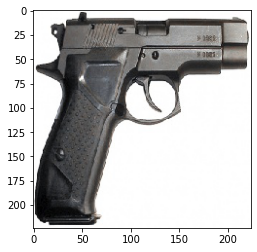

This is an image of a Pistol. Classified and retrieved with 99.66 percent certainity.
/content/drive/MyDrive/TEST/Pistol_2258_5.jpg


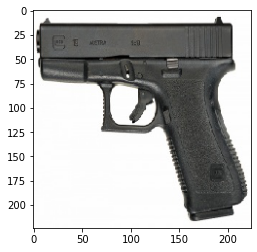

This is an image of a Pistol. Classified and retrieved with 99.98 percent certainity.
/content/drive/MyDrive/TEST/Pistol_2459_9.jpg


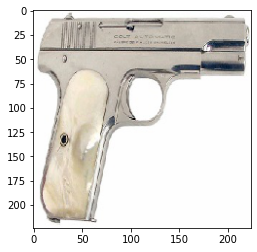

This is an image of a Pistol. Classified and retrieved with 92.53 percent certainity.
/content/drive/MyDrive/TEST/Pistol_2438_13.jpg


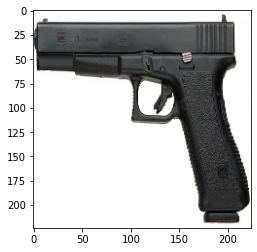

This is an image of a Pistol. Classified and retrieved with 94.15 percent certainity.
/content/drive/MyDrive/TEST/Pistol_698_119.jpg


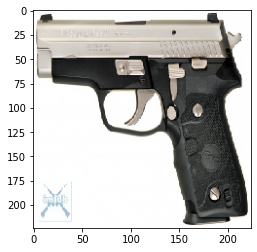

This is an image of a Knife. Classified and retrieved with 55.54 percent certainity.
/content/drive/MyDrive/TEST/Pistol_698_123.jpg


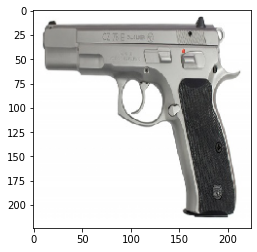

This is an image of a Pistol. Classified and retrieved with 98.24 percent certainity.
/content/drive/MyDrive/TEST/Pistol_973_42.jpg


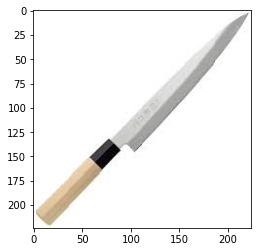

This is an image of a Knife. Classified and retrieved with 99.84 percent certainity.
/content/drive/MyDrive/TEST/445.jpg


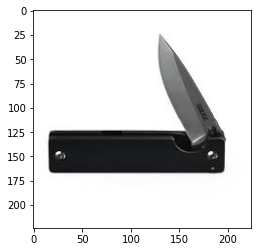

This is an image of a Knife. Classified and retrieved with 99.98 percent certainity.
/content/drive/MyDrive/TEST/446.jpg


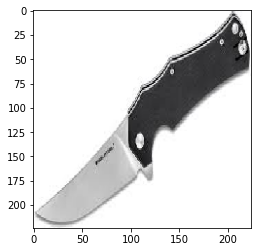

This is an image of a Knife. Classified and retrieved with 99.97 percent certainity.
/content/drive/MyDrive/TEST/439.jpg


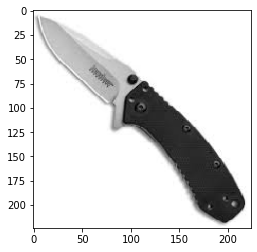

This is an image of a Knife. Classified and retrieved with 99.58 percent certainity.
/content/drive/MyDrive/TEST/435.jpg


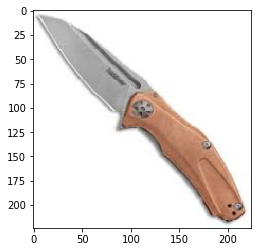

This is an image of a Knife. Classified and retrieved with 99.42 percent certainity.
/content/drive/MyDrive/TEST/436.jpg


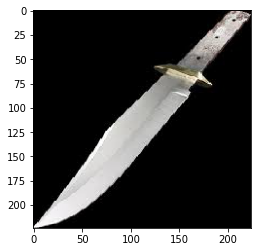

This is an image of a Knife. Classified and retrieved with 99.41 percent certainity.
/content/drive/MyDrive/TEST/418.jpg


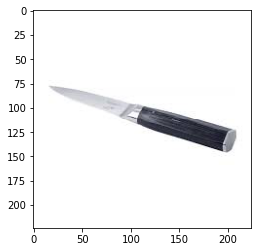

This is an image of a Knife. Classified and retrieved with 99.89 percent certainity.
/content/drive/MyDrive/TEST/406.jpg


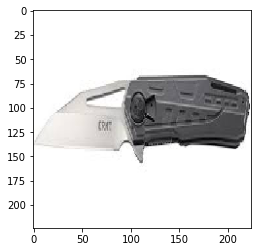

This is an image of a Knife. Classified and retrieved with 99.47 percent certainity.
/content/drive/MyDrive/TEST/392.jpg


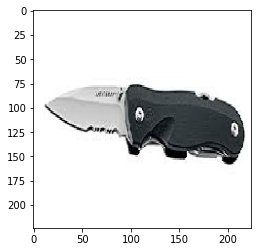

This is an image of a Knife. Classified and retrieved with 89.26 percent certainity.
/content/drive/MyDrive/TEST/417.jpg


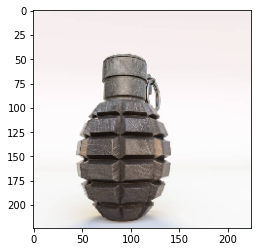

This is an image of a Knife. Classified and retrieved with 77.94 percent certainity.
/content/drive/MyDrive/TEST/e1410.jpg


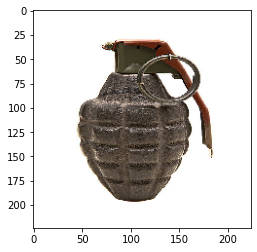

This is an image of a Grenade. Classified and retrieved with 100.00 percent certainity.
/content/drive/MyDrive/TEST/e1397.jpg


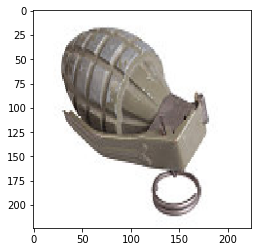

This is an image of a Grenade. Classified and retrieved with 97.68 percent certainity.
/content/drive/MyDrive/TEST/e1391.jpg


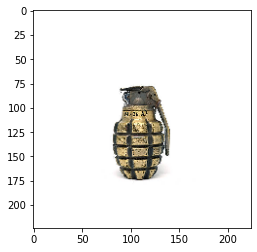

This is an image of a Knife. Classified and retrieved with 85.08 percent certainity.
/content/drive/MyDrive/TEST/e1388.jpg


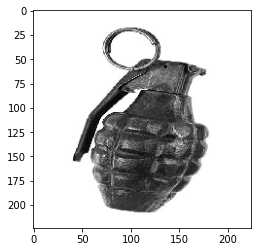

This is an image of a Grenade. Classified and retrieved with 99.92 percent certainity.
/content/drive/MyDrive/TEST/e1385.jpg


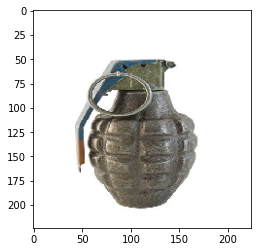

This is an image of a Grenade. Classified and retrieved with 99.95 percent certainity.
/content/drive/MyDrive/TEST/e1387.jpg


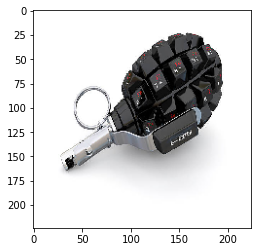

This is an image of a Knife. Classified and retrieved with 72.72 percent certainity.
/content/drive/MyDrive/TEST/e1408.jpg


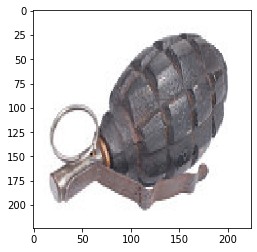

This is an image of a Grenade. Classified and retrieved with 98.85 percent certainity.
/content/drive/MyDrive/TEST/e1390.jpg


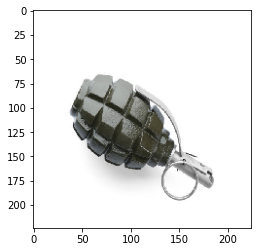

This is an image of a Grenade. Classified and retrieved with 60.05 percent certainity.
/content/drive/MyDrive/TEST/e1424.jpg


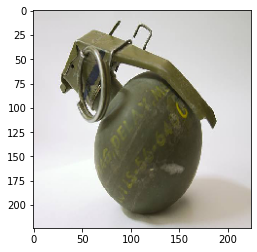

This is an image of a Grenade. Classified and retrieved with 100.00 percent certainity.
/content/drive/MyDrive/TEST/e1436.jpg


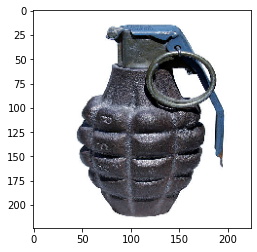

This is an image of a Grenade. Classified and retrieved with 90.86 percent certainity.
/content/drive/MyDrive/TEST/e1419.jpg


In [ ]:

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(224,224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    if class_names[np.argmax(score)]=='Random': continue
    else:
        plt.imshow(img)
        plt.show()
        print(
        "This is an image of a {}. Classified and retrieved with {:.2f} percent certainity."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
        )
        print(dir_path+i)